# ATRP reaction in polymerist demo

In [1]:
import logging
logging.basicConfig(level=logging.INFO)

from pathlib import Path
from polymerist.genutils.fileutils.pathutils import assemble_path

WORKING_DIR : Path = Path('ATRP_demo')
WORKING_DIR.mkdir(exist_ok=True)

## Defining reaction

INFO:rdkit:Enabling RDKit 2023.09.6 jupyter extensions
INFO:numexpr.utils:Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.


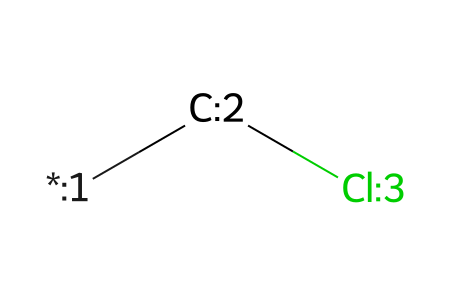

In [2]:
from rdkit import Chem
from polymerist.rdutils.rdkdraw import set_rdkdraw_size
set_rdkdraw_size(300, 3/2)


fn_group_smarts = '[*:1]-[C:2]-[Cl:3]' # this is the moiety active in the ATRP reaction 
fn_group = Chem.MolFromSmarts(fn_group_smarts)
display(fn_group)

byproduct_smarts = '[Cl]-[Cl]' # this is the side product of the reaction that we want to delete
byproduct = Chem.MolFromSmarts(byproduct_smarts)

In [3]:
from polymerist.rdutils.reactions.assembly import ReactionAssembler


assembler = ReactionAssembler(
    reactive_groups=[Chem.Mol(fn_group), Chem.Mol(fn_group)],
    byproducts=[Chem.Mol(byproduct)],
    rxn_name='atom-transfer radical polymerization',
)

3 --x-> 2


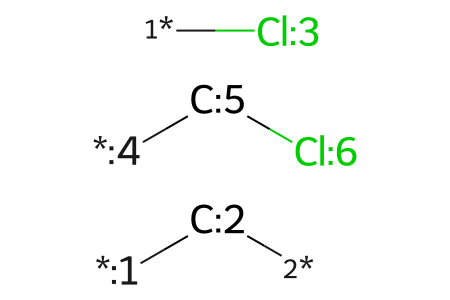

5 --x-> 6


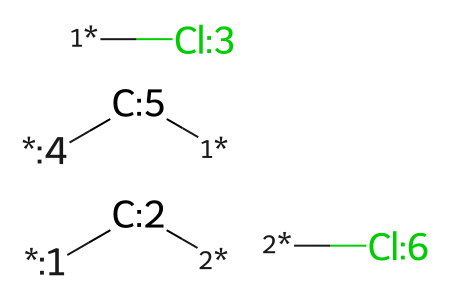

3 ----> 6


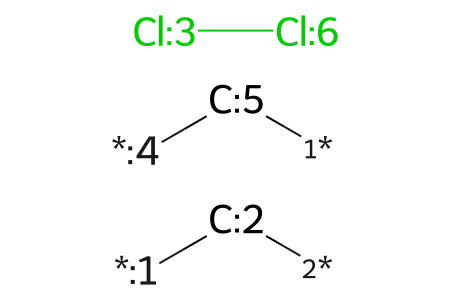

5 ----> 2


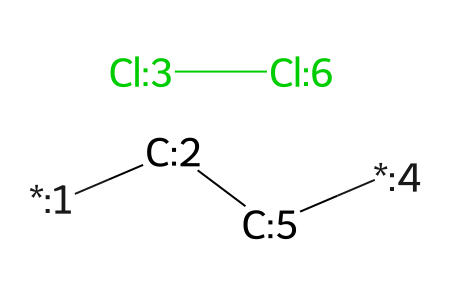

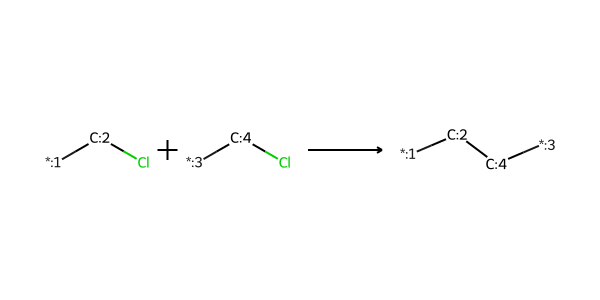

In [4]:
assembler.bond_derangement = {
    3 : (2, 6), # keys are the indices of pivot atoms; values are the atom indices to which the pivot was and will be bonded, respectively
    5 : (6, 2),    
}
rxn = assembler.assemble_rxn(show_steps=True)
display(rxn)

In [5]:
rxn.to_rxnfile(WORKING_DIR / 'atrp.rxn')
rxn_smarts = rxn.to_smarts()

## "Building" a reactor and reacting to enumerate chemical fragments

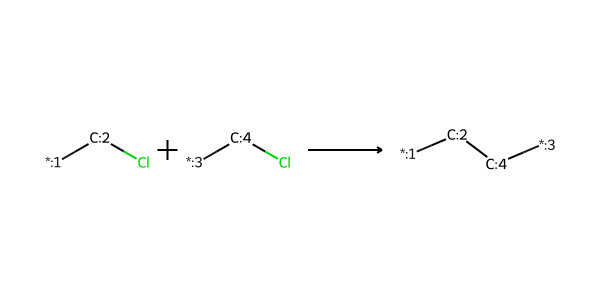

In [6]:
from polymerist.rdutils.reactions.reactions import AnnotatedReaction
from polymerist.rdutils.reactions.reactors import PolymerizationReactor


rxn2 = AnnotatedReaction.from_smarts(rxn_smarts)
reactor = PolymerizationReactor(rxn2)
display(rxn2)

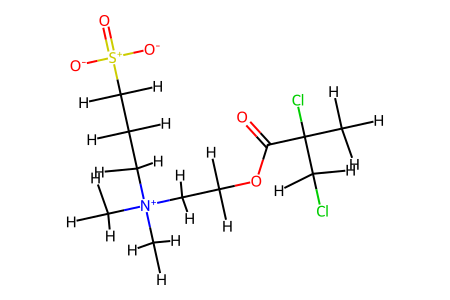

In [7]:
from polymerist.polymers.monomers.specification import expanded_SMILES

monomer_name = 'SBMA'
reactant_smiles = 'CC(Cl)(CCl)C(=O)OCC[N+](C)(C)CCC[S+]([O-])([O-])=O'
# reactant_smiles = 'CC(Cl)(CCl)C(=O)OCC[N+](C)(C)CCCS(=O)(=O)-[OH]'

reactant_smiles_explicit = expanded_SMILES(reactant_smiles, assign_map_nums=False)
reactant = Chem.MolFromSmiles(reactant_smiles_explicit, sanitize=False) # NOTE: sanitize=False here prevents RDKit from re-deleting our hydrogens
Chem.SanitizeMol(reactant)

reactants = [Chem.Mol(reactant), Chem.Mol(reactant)]

display(reactant)

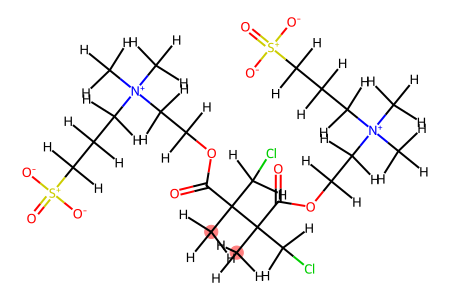

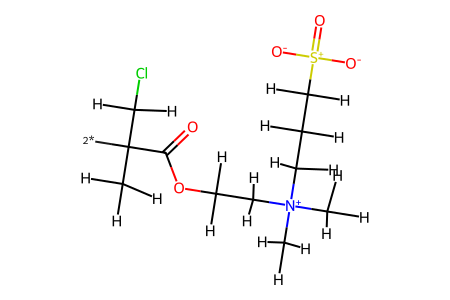

INFO:polymerist.polymers.monomers.repr:Creating new residue category "SBMA_TERM_1", containing singular SMARTS ["[#6D4+0:1](-[#6D4+0:2](-[#6D3+0:3](=[#8D1+0:4])-[#8D2+0:5]-[#6D4+0:6](-[#6D4+0:7](-[#7D4+:8](-[#6D4+0:9](-[#1D1+0:28])(-[#1D1+0:29])-[#1D1+0:30])(-[#6D4+0:10](-[#1D1+0:31])(-[#1D1+0:32])-[#1D1+0:33])-[#6D4+0:11](-[#6D4+0:12](-[#6D4+0:13](-[#16D4+:14](=[#8D1+0:15])(-[#8D1-:16])-[#8D1-:17])(-[#1D1+0:38])-[#1D1+0:39])(-[#1D1+0:36])-[#1D1+0:37])(-[#1D1+0:34])-[#1D1+0:35])(-[#1D1+0:26])-[#1D1+0:27])(-[#1D1+0:24])-[#1D1+0:25])(-[#6D4+0:18](-[#17D1+0:19])(-[#1D1+0:40])-[#1D1+0:41])-[2*:20])(-[#1D1+0:21])(-[#1D1+0:22])-[#1D1+0:23]"])


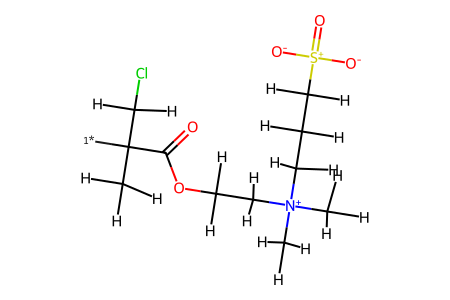

INFO:polymerist.polymers.monomers.repr:Creating new residue category "SBMA_TERM_2", containing singular SMARTS ["[#6D4+0:1](-[#6D4+0:2](-[#1D1+0:21])(-[#1D1+0:22])-[#1D1+0:23])(-[#6D3+0:3](=[#8D1+0:4])-[#8D2+0:5]-[#6D4+0:6](-[#6D4+0:7](-[#7D4+:8](-[#6D4+0:9](-[#1D1+0:28])(-[#1D1+0:29])-[#1D1+0:30])(-[#6D4+0:10](-[#1D1+0:31])(-[#1D1+0:32])-[#1D1+0:33])-[#6D4+0:11](-[#6D4+0:12](-[#6D4+0:13](-[#16D4+:14](=[#8D1+0:15])(-[#8D1-:16])-[#8D1-:17])(-[#1D1+0:38])-[#1D1+0:39])(-[#1D1+0:36])-[#1D1+0:37])(-[#1D1+0:34])-[#1D1+0:35])(-[#1D1+0:26])-[#1D1+0:27])(-[#1D1+0:24])-[#1D1+0:25])(-[#6D4+0:18](-[#17D1+0:19])(-[#1D1+0:40])-[#1D1+0:41])-[1*:20]"])


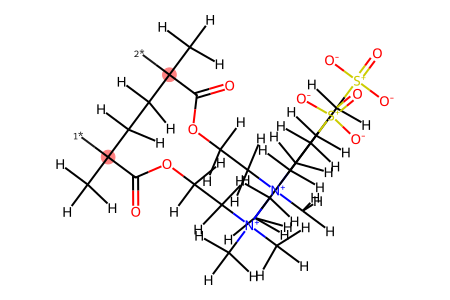

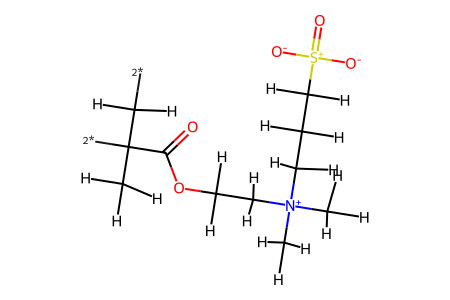

INFO:polymerist.polymers.monomers.repr:Creating new residue category "SBMA_MID_1", containing singular SMARTS ["[#6D4+0:1](-[#6D4+0:2](-[2*:3])(-[#1D1+0:21])-[#1D1+0:22])(-[#6D4+0:4](-[#1D1+0:23])(-[#1D1+0:24])-[#1D1+0:25])(-[#6D3+0:5](=[#8D1+0:6])-[#8D2+0:7]-[#6D4+0:8](-[#6D4+0:9](-[#7D4+:10](-[#6D4+0:11](-[#1D1+0:30])(-[#1D1+0:31])-[#1D1+0:32])(-[#6D4+0:12](-[#1D1+0:33])(-[#1D1+0:34])-[#1D1+0:35])-[#6D4+0:13](-[#6D4+0:14](-[#6D4+0:15](-[#16D4+:16](=[#8D1+0:17])(-[#8D1-:18])-[#8D1-:19])(-[#1D1+0:40])-[#1D1+0:41])(-[#1D1+0:38])-[#1D1+0:39])(-[#1D1+0:36])-[#1D1+0:37])(-[#1D1+0:28])-[#1D1+0:29])(-[#1D1+0:26])-[#1D1+0:27])-[2*:20]"])


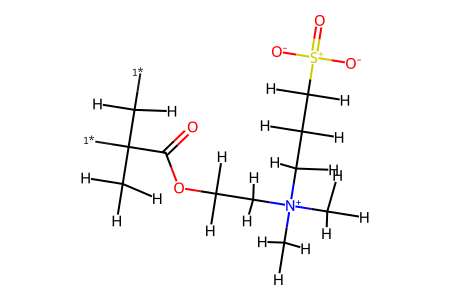

INFO:polymerist.polymers.monomers.repr:Creating new residue category "SBMA_MID_2", containing singular SMARTS ["[#6D4+0:1](-[#6D4+0:2](-[#6D4+0:3](-[#1D1+0:23])(-[#1D1+0:24])-[#1D1+0:25])(-[#6D3+0:4](=[#8D1+0:5])-[#8D2+0:6]-[#6D4+0:7](-[#6D4+0:8](-[#7D4+:9](-[#6D4+0:10](-[#1D1+0:30])(-[#1D1+0:31])-[#1D1+0:32])(-[#6D4+0:11](-[#1D1+0:33])(-[#1D1+0:34])-[#1D1+0:35])-[#6D4+0:12](-[#6D4+0:13](-[#6D4+0:14](-[#16D4+:15](=[#8D1+0:16])(-[#8D1-:17])-[#8D1-:18])(-[#1D1+0:40])-[#1D1+0:41])(-[#1D1+0:38])-[#1D1+0:39])(-[#1D1+0:36])-[#1D1+0:37])(-[#1D1+0:28])-[#1D1+0:29])(-[#1D1+0:26])-[#1D1+0:27])-[1*:19])(-[1*:20])(-[#1D1+0:21])-[#1D1+0:22]"])


In [8]:
from polymerist.polymers.monomers import MonomerGroup
from polymerist.polymers.monomers.specification import compliant_mol_SMARTS
from polymerist.rdutils.bonding.portlib import get_num_ports


# NOTE: this is an ugly hack while I figure out how to properly encode formal charges within the monomer spec
smarts_replacements = {
    '#7&D4&+'  : '#7D4+',
    '#16&D4&+' : '#16D4+',
    '#8&D1&-'  : '#8D1-',
}

monogrp = MonomerGroup()
for dimers, frags in reactor.propagate(reactants):
    for dimer in dimers:
        display(dimer)
        
    for i, frag in enumerate(frags, start=1):
        display(frag)
        functionality = get_num_ports(frag)
        functionality_desc = 'TERM' if functionality == 1 else 'MID'
        
        frag_smarts = Chem.MolToSmarts(frag)
        frag_smarts_explicit = expanded_SMILES(frag_smarts, assign_map_nums=True)
        frag_smarts_spec = compliant_mol_SMARTS(frag_smarts_explicit)
        for bad_smarts, good_smarts in smarts_replacements.items():
            frag_smarts_spec = frag_smarts_spec.replace(bad_smarts, good_smarts)
        
        monogrp.add_monomer(f'{monomer_name}_{functionality_desc}_{i}', frag_smarts_spec)
        
    print('='*50)

SBMA_TERM_1


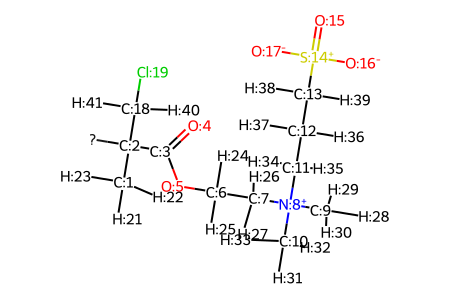

SBMA_TERM_2


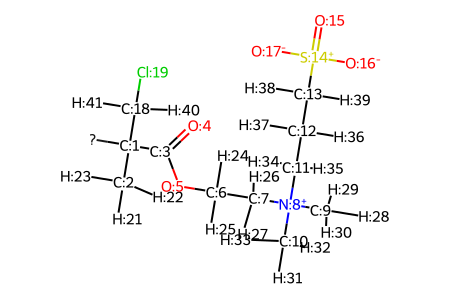

SBMA_MID_1


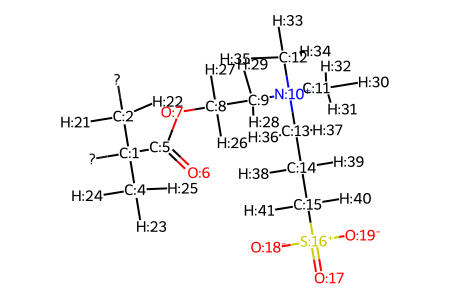

SBMA_MID_2


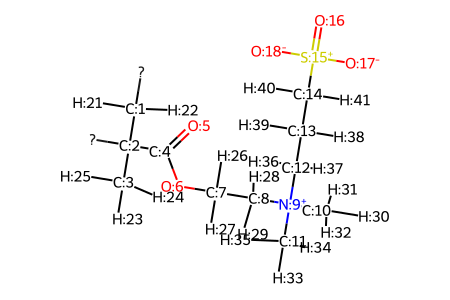

In [9]:
fragments_path = assemble_path(WORKING_DIR, monomer_name, postfix='fragments', extension='json')
monogrp.to_file(fragments_path)
for name, residue in monogrp.iter_rdmols():
    print(name)
    display(residue)

## Build a linear polymer from our newly-generated fragments

In [10]:
from polymerist.polymers.building import build_linear_polymer, mbmol_to_openmm_pdb, mbmol_to_rdkit_pdb


n_monomers : int = 8

polymer_name = f'{monomer_name}_{n_monomers}-mer'
chain = build_linear_polymer(
    monogrp,
    n_monomers=n_monomers,
    sequence='BA',
    energy_minimize=True,
)
chain.visualize()

pdb_path = assemble_path(WORKING_DIR, polymer_name, extension='pdb')
mbmol_to_openmm_pdb(pdb_path, chain, resname_map={'SBMA_TERM_1' : 'ABC'})

[17:48:28] WARNING: not removing hydrogen atom with dummy atom neighbors
INFO:polymerist.polymers.building.sequencing:Sequence kernel "BA" is already fully reduced; no changes made
INFO:polymerist.polymers.building.linear:Target chain length achievable with 3 whole 2-sequence repeat(s), namely with the sequence [SBMA_TERM_1] + 3*[BA] + [SBMA_TERM_2]
INFO:polymerist.polymers.building.linear:Registering middle monomer SBMA_MID_1 (block identifier "B")
[17:48:28] UFFTYPER: Unrecognized charge state for atom: 26
[17:48:28] UFFTYPER: Unrecognized charge state for atom: 26
INFO:polymerist.polymers.building.linear:Registering middle monomer SBMA_MID_2 (block identifier "A")
[17:48:28] UFFTYPER: Unrecognized charge state for atom: 23
[17:48:28] UFFTYPER: Unrecognized charge state for atom: 23
INFO:polymerist.polymers.building.linear:Registering terminal monomer SBMA_TERM_1 (orientation "head")
[17:48:28] UFFTYPER: Unrecognized charge state for atom: 19
[17:48:28] UFFTYPER: Unrecognized charge 

## Load into OpenFF, injecting chemical info into PDB using our templates

In [11]:
from openff.toolkit import Molecule, Topology, ForceField
from polymerist.mdtools.openfftools import topology
from polymerist.mdtools.openfftools.partition import partition


offtop = Topology.from_pdb(pdb_path, _custom_substructures=monogrp.monomers)
was_partitioned = partition(offtop)
assert was_partitioned

sdf_path = assemble_path(WORKING_DIR, polymer_name, extension='sdf')
topology.topology_to_sdf(sdf_path, offtop)

offmol = topology.get_largest_offmol(offtop)
offmol.visualize(backend='nglview')

NGLWidget()

In [12]:
from polymerist.mdtools.openfftools.partialcharge.molchargers import NAGLCharger, EspalomaCharger

charger = NAGLCharger()
# charger = EspalomaCharger()
charged_mol = charger.charge_molecule(offmol)
charged_top = charged_mol.to_topology()

sdf_path_charged = assemble_path(WORKING_DIR, polymer_name, postfix='charged', extension='sdf')
topology.topology_to_sdf(sdf_path_charged, charged_top)

INFO:polymerist.mdtools.openfftools.partialcharge.molchargers:Assigning partial charges via the "NAGL" method
INFO:openff.nagl.nn._models:Could not find property in lookup table: 'Could not find property value for molecule with InChI InChI=1/C88H168Cl2N8O40S8/c1-81(73(99)131-55-47-91(9,10)39-25-63-139(107,108)109,83(3,75(101)133-57-49-93(13,14)41-27-65-141(113,114)115)35-37-85(5,77(103)135-59-51-95(17,18)43-29-67-143(119,120)121)87(7,71-89)79(105)137-61-53-97(21,22)45-31-69-145(125,126)127)33-34-82(2,74(100)132-56-48-92(11,12)40-26-64-140(110,111)112)84(4,76(102)134-58-50-94(15,16)42-28-66-142(116,117)118)36-38-86(6,78(104)136-60-52-96(19,20)44-30-68-144(122,123)124)88(8,72-90)80(106)138-62-54-98(23,24)46-32-70-146(128,129)130/h25-72H2,1-24H3/t81-,82-,83-,84-,85-,86-,87-,88+/m1/s1'
INFO:polymerist.mdtools.openfftools.partialcharge.molchargers:Successfully assigned "NAGL" charges


## Solvating polymer system

In [13]:
from openmm.unit import Quantity, nanometer
from polymerist.mdtools.openfftools import boxvectors


# define periodic box vectors, based on a padded version of the tight bounding box of all your molecules (the topology)
box_padding : Quantity = 1.0 * nanometer
box_vecs_tight = boxvectors.get_topology_bbox(offtop)
box_vecs = boxvectors.pad_box_vectors_uniform(box_vecs_tight, box_padding)

In [14]:
from openmm.unit import gram, centimeter
from polymerist.mdtools.openfftools.solvation import packing, solvents


target_density : Quantity = 2.0 * gram * centimeter**-3

packtop = packing.pack_topology_with_solvent(
    offtop=charged_top,
    solvent=solvents.water_TIP3P,
    box_vecs=box_vecs,
    density=target_density,
)

packtop.to_file(assemble_path(WORKING_DIR, polymer_name, postfix='solvated', extension='pdb')) # saving extra PDB purely for visualization (SDF only lets you see molecules one-at-a-time)
topology.topology_to_sdf(assemble_path(WORKING_DIR, polymer_name, postfix='solvated', extension='sdf'), packtop)

INFO:polymerist.mdtools.openfftools.solvation.packing:Solvating 59.39459449200001 nm**3 Topology with 3971 water_TIP3P molecules to density of 2.0 g/(cm**3)
INFO:polymerist.mdtools.openfftools.solvation.packing:Packmol packing converged
INFO:polymerist.mdtools.openfftools.solvation.packing:Set solvated Topology box vectors to [[4.1208 0.0 0.0] [0.0 3.7681999999999998 0.0] [0.0 0.0 3.825]] nanometer


## Injection SMIRNOFF parameters via OpenFF force field and creating Interchange for eventual export

In [15]:
from openff.toolkit import ForceField
from polymerist.mdtools.openmmtools.forcegroups import impose_unique_force_groups


# create interchange object
ff = ForceField('openff-2.0.0.offxml')
inc = ff.create_interchange(packtop, charge_from_molecules=[charged_mol, solvents.water_TIP3P])
inc.box = box_vecs

INFO:openff.toolkit.typing.engines.smirnoff.parameters:Attempting to up-convert vdW section from 0.3 to 0.4
INFO:openff.toolkit.typing.engines.smirnoff.parameters:Successfully up-converted vdW section from 0.3 to 0.4. `method="cutoff"` is now split into `periodic_method="cutoff"` and `nonperiodic_method="no-cutoff"`.
INFO:openff.toolkit.typing.engines.smirnoff.parameters:Attempting to up-convert Electrostatics section from 0.3 to 0.4
INFO:openff.toolkit.typing.engines.smirnoff.parameters:Successfully up-converted Electrostatics section from 0.3 to 0.4. `method="PME"` is now split into `periodic_potential="Ewald3D-ConductingBoundary"`, `nonperiodic_potential="Coulomb"`, and `exception_potential="Coulomb"`.


## Defining parameters for and then running a series of simulations

In [16]:
# define how you want to run your simulation
from openmm.unit import kelvin, nanoseconds, picoseconds, femtoseconds
from polymerist.mdtools.openmmtools.parameters import (
    SimulationParameters,
    ThermoParameters,
    IntegratorParameters,
    ReporterParameters,
)
from polymerist.mdtools.openmmtools.reporters import DEFAULT_STATE_DATA_PROPS


sim_params = SimulationParameters(
    thermo_params=ThermoParameters(
        ensemble='NVT',
        temperature=300*kelvin,
        friction_coeff=1*picoseconds**-1,
    ),
    integ_params=IntegratorParameters(
        time_step=2*femtoseconds,
        total_time=0.5*nanoseconds,
        num_samples=50,
    ),
    reporter_params=ReporterParameters(
        traj_ext='dcd',
        state_data=DEFAULT_STATE_DATA_PROPS, # NOTE: you can tweak which of these you want to write out during a simulation
    )
)
# sim_params.to_file(WORKING_DIR / 'equil.json')

In [17]:
# extract OpenMM stuff from the Interchange, ensuring you can decompose your FF energy contributions later
from openff.interchange.interop.openmm._positions import to_openmm_positions

omm_topology = inc.to_openmm_topology()
omm_system  = inc.to_openmm(combine_nonbonded_forces=False)
omm_positions = to_openmm_positions(inc, include_virtual_sites=True)
impose_unique_force_groups(omm_system) # ensure each Force is separate to enable mapping of energy contributions

In [20]:
from polymerist.mdtools.openmmtools.execution import run_simulation_schedule
from polymerist.genutils.logutils.IOHandlers import MSFHandlerFlex, get_active_loggers


logpath = assemble_path(WORKING_DIR, 'simulation_status', extension='log')
with MSFHandlerFlex(filename=logpath, loggers=get_active_loggers(), proc_name='atrp_sims') as logger:
    history = run_simulation_schedule(
        working_dir=WORKING_DIR,
        schedule={
            'equilibration' : sim_params,
        },
        init_top=omm_topology,
        init_sys=omm_system,
        init_pos=omm_positions,
        return_history=True
    )

INFO:polymerist.mdtools.openmmtools.execution:Initializing simulation 1/1 ("equilibration")
INFO:polymerist.mdtools.openmmtools.thermo:Created LangevinMiddleIntegrator for NVT (Canonical) ensemble
INFO:polymerist.mdtools.openmmtools.preparation:Setting simulation state
INFO:polymerist.mdtools.openmmtools.reporters:Prepared DCDReporter which reports to ATRP_demo/equilibration/equilibration_trajectory.dcd
INFO:polymerist.mdtools.openmmtools.reporters:Prepared CheckpointReporter which reports to ATRP_demo/equilibration/equilibration_checkpoint.chk
INFO:polymerist.mdtools.openmmtools.reporters:Prepared StateReporter which reports to ATRP_demo/equilibration/equilibration_state.xml
INFO:polymerist.mdtools.openmmtools.reporters:Prepared StateDataReporter which reports to ATRP_demo/equilibration/equilibration_state_data.csv
INFO:polymerist.mdtools.openmmtools.preparation:Setting positions in Context
INFO:polymerist.mdtools.openmmtools.execution:Performing energy minimization (initial PE = 1335